In [2]:
import pandas as pd
import numpy as np
import regex as re
import string
import docx2txt

In [4]:
# extract text
text = docx2txt.process("Letter.docx")
# Cleaning text and lower casing all words
text = text.translate(str.maketrans('', '', string.punctuation))
text = text.lower()

In [5]:
text

'“letter 1\n\nto mrs saville england scrapers\n\nst petersburgh dec 11th 17—\n\nyou will rejoice to hear that no disaster has accompanied the commencement of an enterprise which you have regarded with such evil forebodings i arrived here yesterday and my first task is to assure my you dear sister of my welfare and increasing confidence in the success of my undertaking\n\ni am already far north of london and as i walk in the streets of petersburgh i feel a cold northern breeze play upon my cheeks which braces my nerves and fills me with delight do you understand this feeling this breeze which has travelled from the regions towards which i am advancing gives me a foretaste of those icy climes inspirited by this wind of promise my daydreams become more fervent and vivid i try in vain to be persuaded that the pole is the seat of frost and desolation it ever presents are itself to my imagination as the region of beauty and delight there margaret the sun is for ever visible its broad disk ju

In [6]:
# split returns a list of words delimited by sequences of whitespace (including tabs, newlines, etc, like re's \s) 
word_list = text.split()

In [7]:
#Word list variables

In [8]:
from collections import Counter
#Generating Word Count Map
word_count_list = Counter(word_list).most_common()
word_dict = dict(word_count_list)

In [9]:
# Another way to get word count map.
#d = {}

# counting number of times each word comes up in list of words (in dictionary)
#for word in word_list: 
#    d[word] = d.get(word, 0) + 1

In [10]:
##1.Dictionary of word count

In [11]:
# Another way to get word count map.
# wordlist = text.split()

# wordfreq = [wordlist.count(w) for w in wordlist] # a list comprehension

# print("String\n" + text +"\n")
# print("List\n" + str(wordlist) + "\n")
# print("Frequencies\n" + str(wordfreq) + "\n")
# print("Pairs\n" + str(list(zip(wordlist, wordfreq))))
# Given a list of words, return a dictionary of
# word-frequency pairs.

# def wordListToFreqDict(wordlist):
#     wordfreq = [wordlist.count(p) for p in wordlist]
#     return dict(list(zip(wordlist,wordfreq)))

# Word_dict= dict(list(zip(wordlist,wordfreq)))

In [12]:
##2.Four sentences contain hidden cherecters

In [13]:
text1 = docx2txt.process("Letter.docx")

In [14]:
symbol_list=[]
r = r'[*]{1}.*[*]{1}'
symbol_list = re.findall(r,text1)
print(symbol_list)

["*You're*", '*killin*', '*it!*']


In [15]:
symbol1_list=[]
r = r'[<]{1}.*[<]{1}'
symbol1_list = re.findall(r,text1)
print(symbol1_list)

['<Scrapers<', '<for<', '<the<', '<win!<']


In [16]:
symbol2_list=[]
r = r'[#]{1}.*[#]{1}'
symbol2_list = re.findall(r,text1)
print(symbol2_list)

['#Found#', '#another#', '#one!#']


In [17]:
symbol3_list=[]
r = r'[$]{1}.*[$]{1}'
symbol3_list = re.findall(r,text1)
print(symbol3_list)

['$You$', '$are$', '$amazing!$']


In [18]:
##3. Save dictionary into a jsonfile

In [19]:
import json  
     
# Data to be written  
     
with open("word_count_dict.json", "w") as outfile:  
    json.dump(word_dict,outfile )

In [20]:
outfile.close()

In [21]:
##4. Join the four hidden sentences

In [22]:
listA = symbol_list
listB = symbol1_list
listC = symbol2_list
listD = symbol3_list

# Given lists
print("Given list A: " ,listA)
print("Given list B: " ,listB)
print("Given list C: ",listC)
print("Given list C: ",listD)

# using + operator
res_list = listA + listB + listC + listD

# printing result
print("Combined list is : ",res_list)

Given list A:  ["*You're*", '*killin*', '*it!*']
Given list B:  ['<Scrapers<', '<for<', '<the<', '<win!<']
Given list C:  ['#Found#', '#another#', '#one!#']
Given list C:  ['$You$', '$are$', '$amazing!$']
Combined list is :  ["*You're*", '*killin*', '*it!*', '<Scrapers<', '<for<', '<the<', '<win!<', '#Found#', '#another#', '#one!#', '$You$', '$are$', '$amazing!$']


In [23]:
##5.Removing hidden sentences

In [24]:
text2 = re.sub(re.compile('[<$#*]{1}\w*\'*!*\w*[<$#*]{1}'),"",text1)
#[<]{1}.*[<]{1}

In [25]:
text2

'“Letter 1\n\nTo Mrs. Saville, England. \n\nSt. Petersburgh, Dec. 11th, 17—.\n\nYou will rejoice to hear that no disaster has accompanied the commencement of an enterprise which you have regarded with such evil forebodings. I arrived here yesterday, and my first task is to assure my  dear sister of my welfare and increasing confidence in the success of my undertaking.\n\nI am already far north of London, and as I walk in the streets of Petersburgh, I feel a cold northern breeze play upon my cheeks, which braces my nerves and fills me with delight. Do you understand this feeling? This breeze, which has travelled from the regions towards which I am advancing, gives me a foretaste of those icy climes. Inspirited by this wind of promise, my daydreams become more fervent and vivid. I try in vain to be persuaded that the pole is the seat of frost and desolation; it ever presents  itself to my imagination as the region of beauty and delight. There, Margaret, the sun is for ever visible, its b

In [26]:
##5. Saving the text file

In [27]:
output_file = open('Clean_Frankenstein.txt','w')
output_file.write(text2)
output_file.close()

In [28]:
##6. Plotting histogram

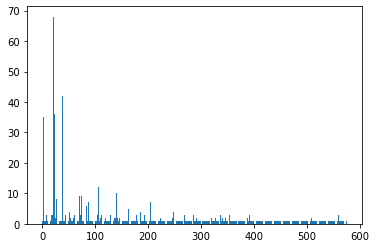

In [29]:
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt

counts = Counter(word_list)

labels, values = zip(*counts.items())

indexes = np.arange(len(labels))

plt.bar(indexes, values)
plt.show()

In [30]:
#Histogram of word count

In [31]:
f = open("input.txt",'r')
fileStr = f.read()
f.close()

fileStr = fileStr.translate(str.maketrans('', '', string.punctuation))
fileStr = fileStr.lower()
    
words = fileStr.split()
d1 = {}
for word in words: 
    word_len = len(word)
    d1[word_len] = d1.get(word_len, 0) + 1
d1

{6: 94,
 1: 74,
 2: 230,
 3: 222,
 7: 92,
 12: 10,
 11: 28,
 4: 179,
 8: 58,
 10: 28,
 5: 134,
 9: 60,
 16: 1,
 14: 2,
 13: 1}

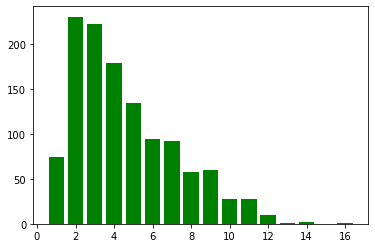

In [32]:
import matplotlib.pyplot as plt

dictionary = d1
plt.bar(list(dictionary.keys()), dictionary.values(), color='g')
plt.show()

In [33]:
## Histogram of the count of words by word length for all words in the document